In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D

In [3]:
data = pd.read_excel("mpd2020.xlsx", sheet_name='Full data')
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


In [5]:
# loop over each country to understand which years are available
cntry_year=[]
for cntry in data.country.unique():
    cy_data=data[data.country == cntry]['year']
    ymin,ymax =cy_data.min(),cy_data.max()
    cntry_year.append((cntry,ymin,ymax))
#duplicates data but only contain columns contru,min year,max year
#set_index('country')->conutry column will used as row labels 
cntry_year=pd.DataFrame(cntry_year,columns=['country','Min year','Max year']).set_index('country')
cntry_year

,Min year,Max year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018
...,...,...
Yemen,1820,2018
Former Yugoslavia,1,2018
South Africa,1,2018


In [6]:
code_to_name = data[['countrycode','country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


GDP
)

In [7]:
gdppc = data.set_index(['countrycode','year'])['gdppc']
gdppc = gdppc.unstack('countrycode')

unstack() transform stacked to wide format and it useful when we have multi-level index and want to rearrange data 
unstack the countrycode level of row index and transform it into columns

In [8]:
gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


In [10]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.Dark2(np.linspace(0, 0.8, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for country, color in zip(country_names, colors)}

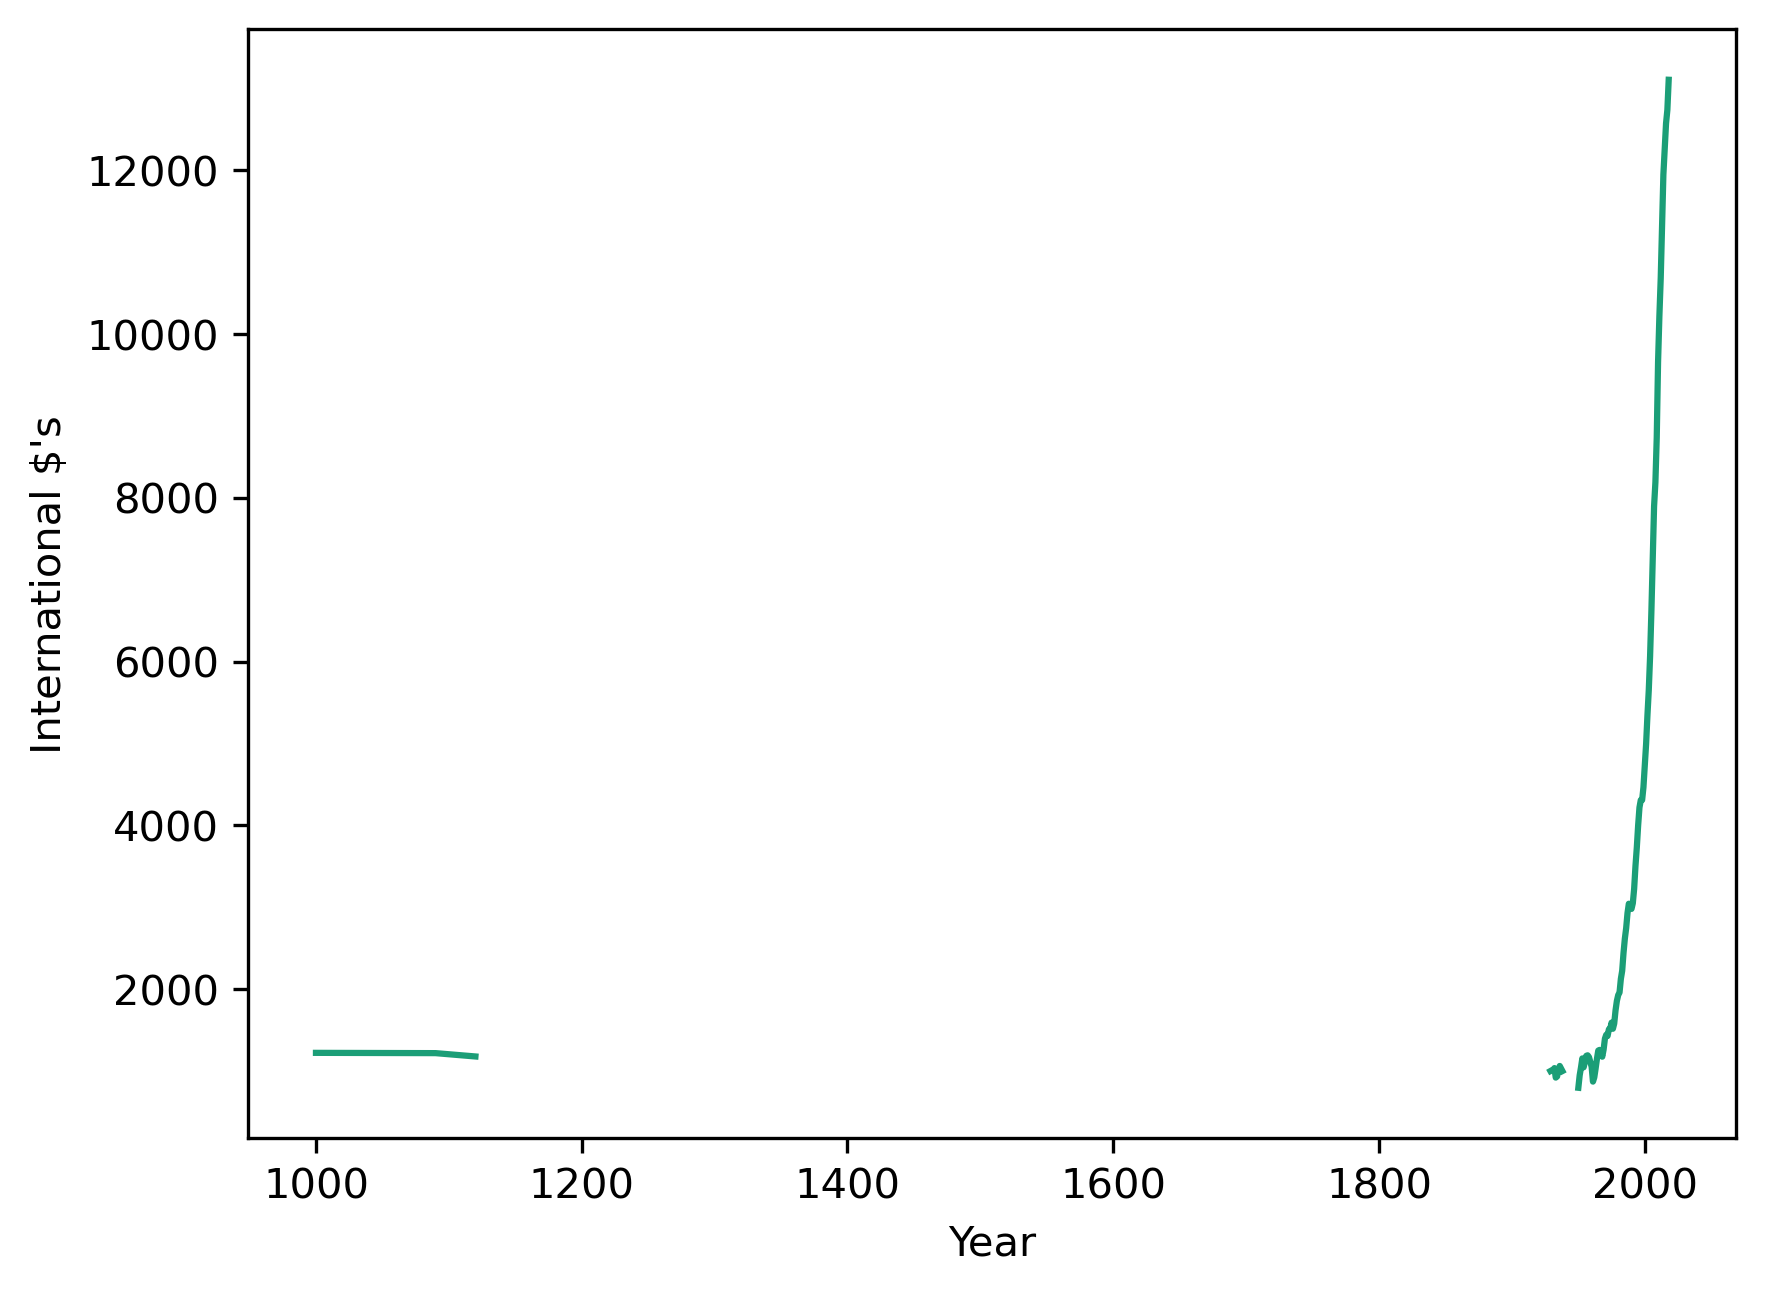

In [11]:
# GPD plots for china 
fig, ax = plt.subplots(dpi=300)
cntry = 'CHN'
_ = gdppc[cntry].plot(
    ax = fig.gca(),
    ylabel = 'International $\'s',
    xlabel = 'Year',
    linestyle='-',
    color=color_mapping['CHN'])

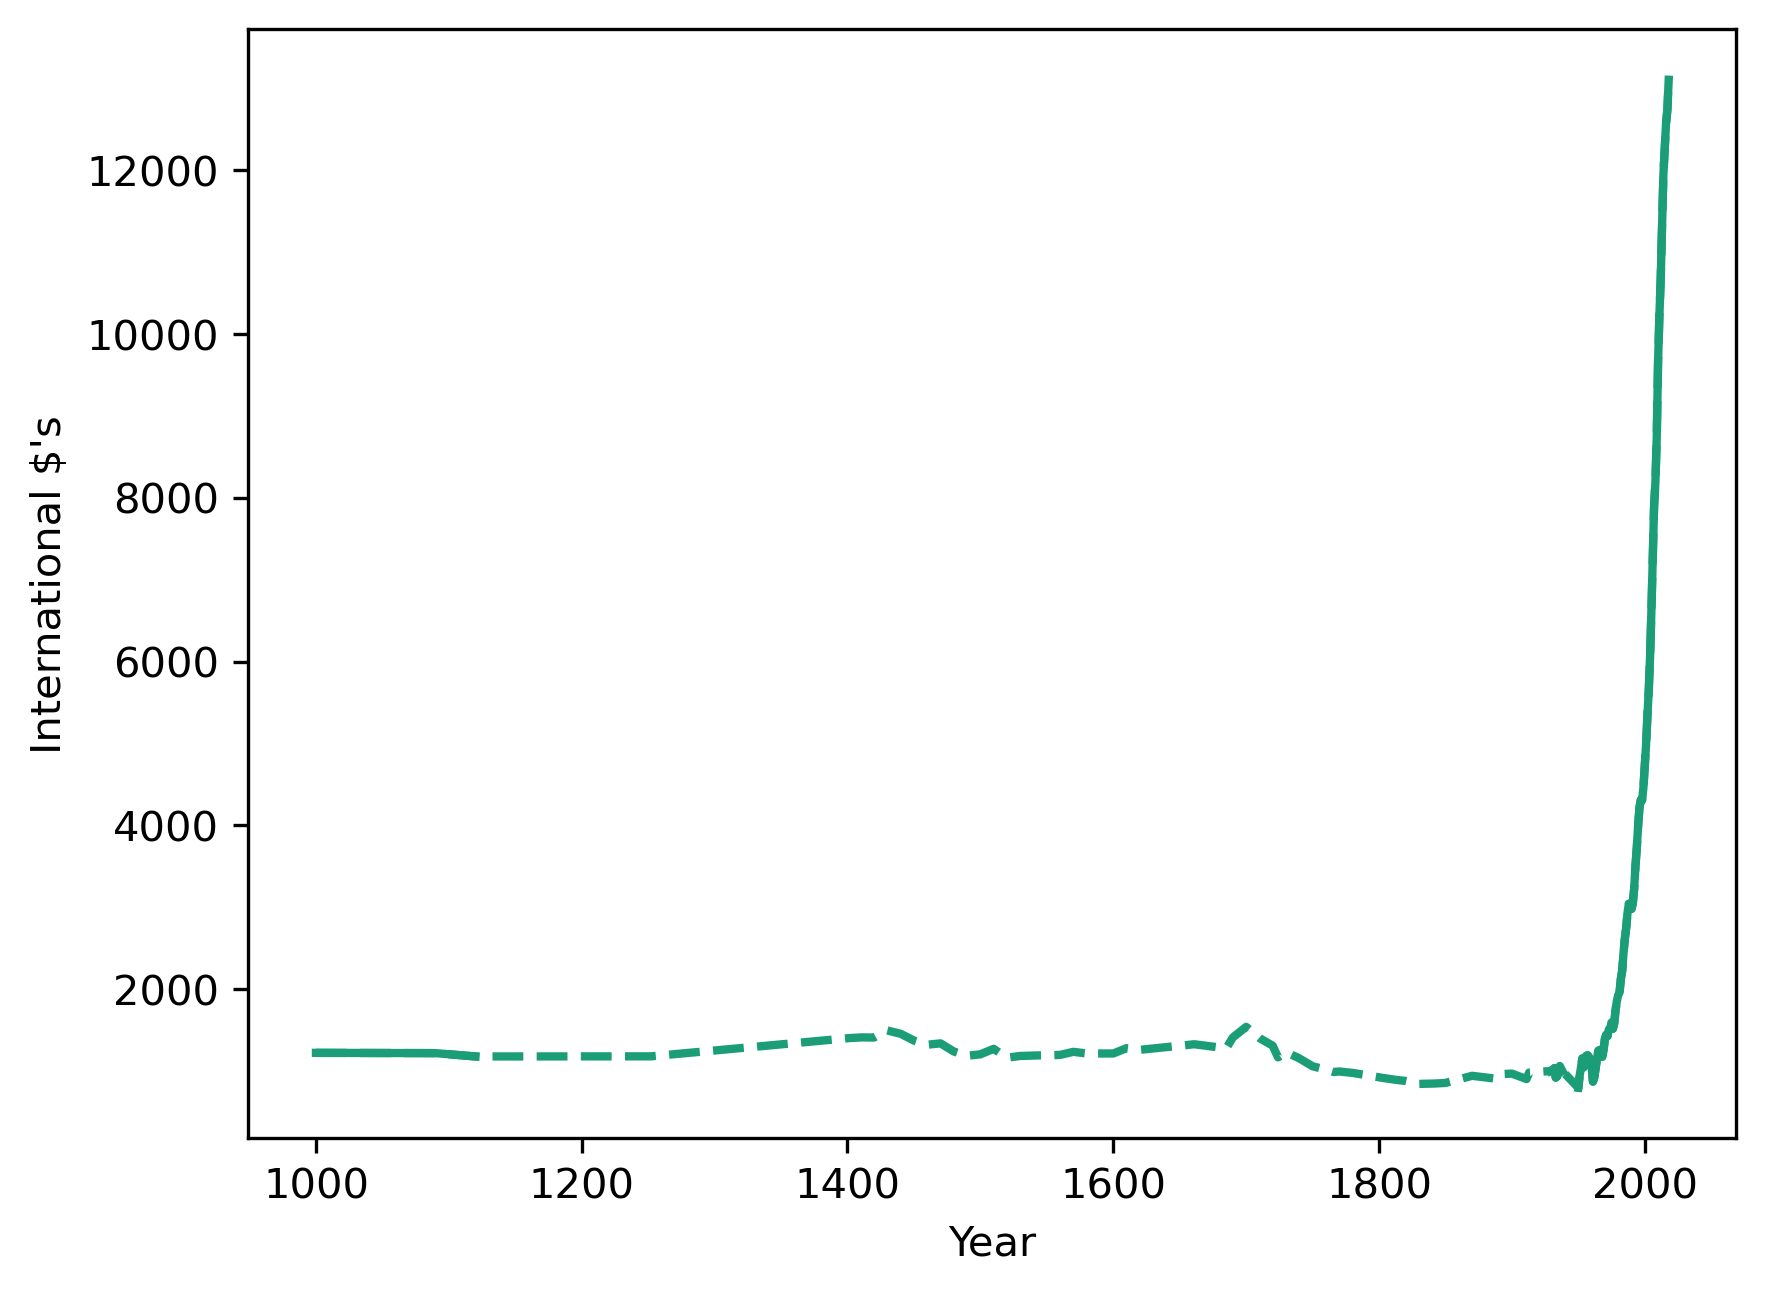

In [12]:
fig, ax = plt.subplots(dpi=300)
cntry = 'CHN'
ax.plot(gdppc[cntry].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[cntry])

ax.plot(gdppc[cntry],
        linestyle='-',
        lw=2,
        color=color_mapping[cntry])
ax.set_ylabel('International $\'s')
ax.set_xlabel('Year')
plt.show()

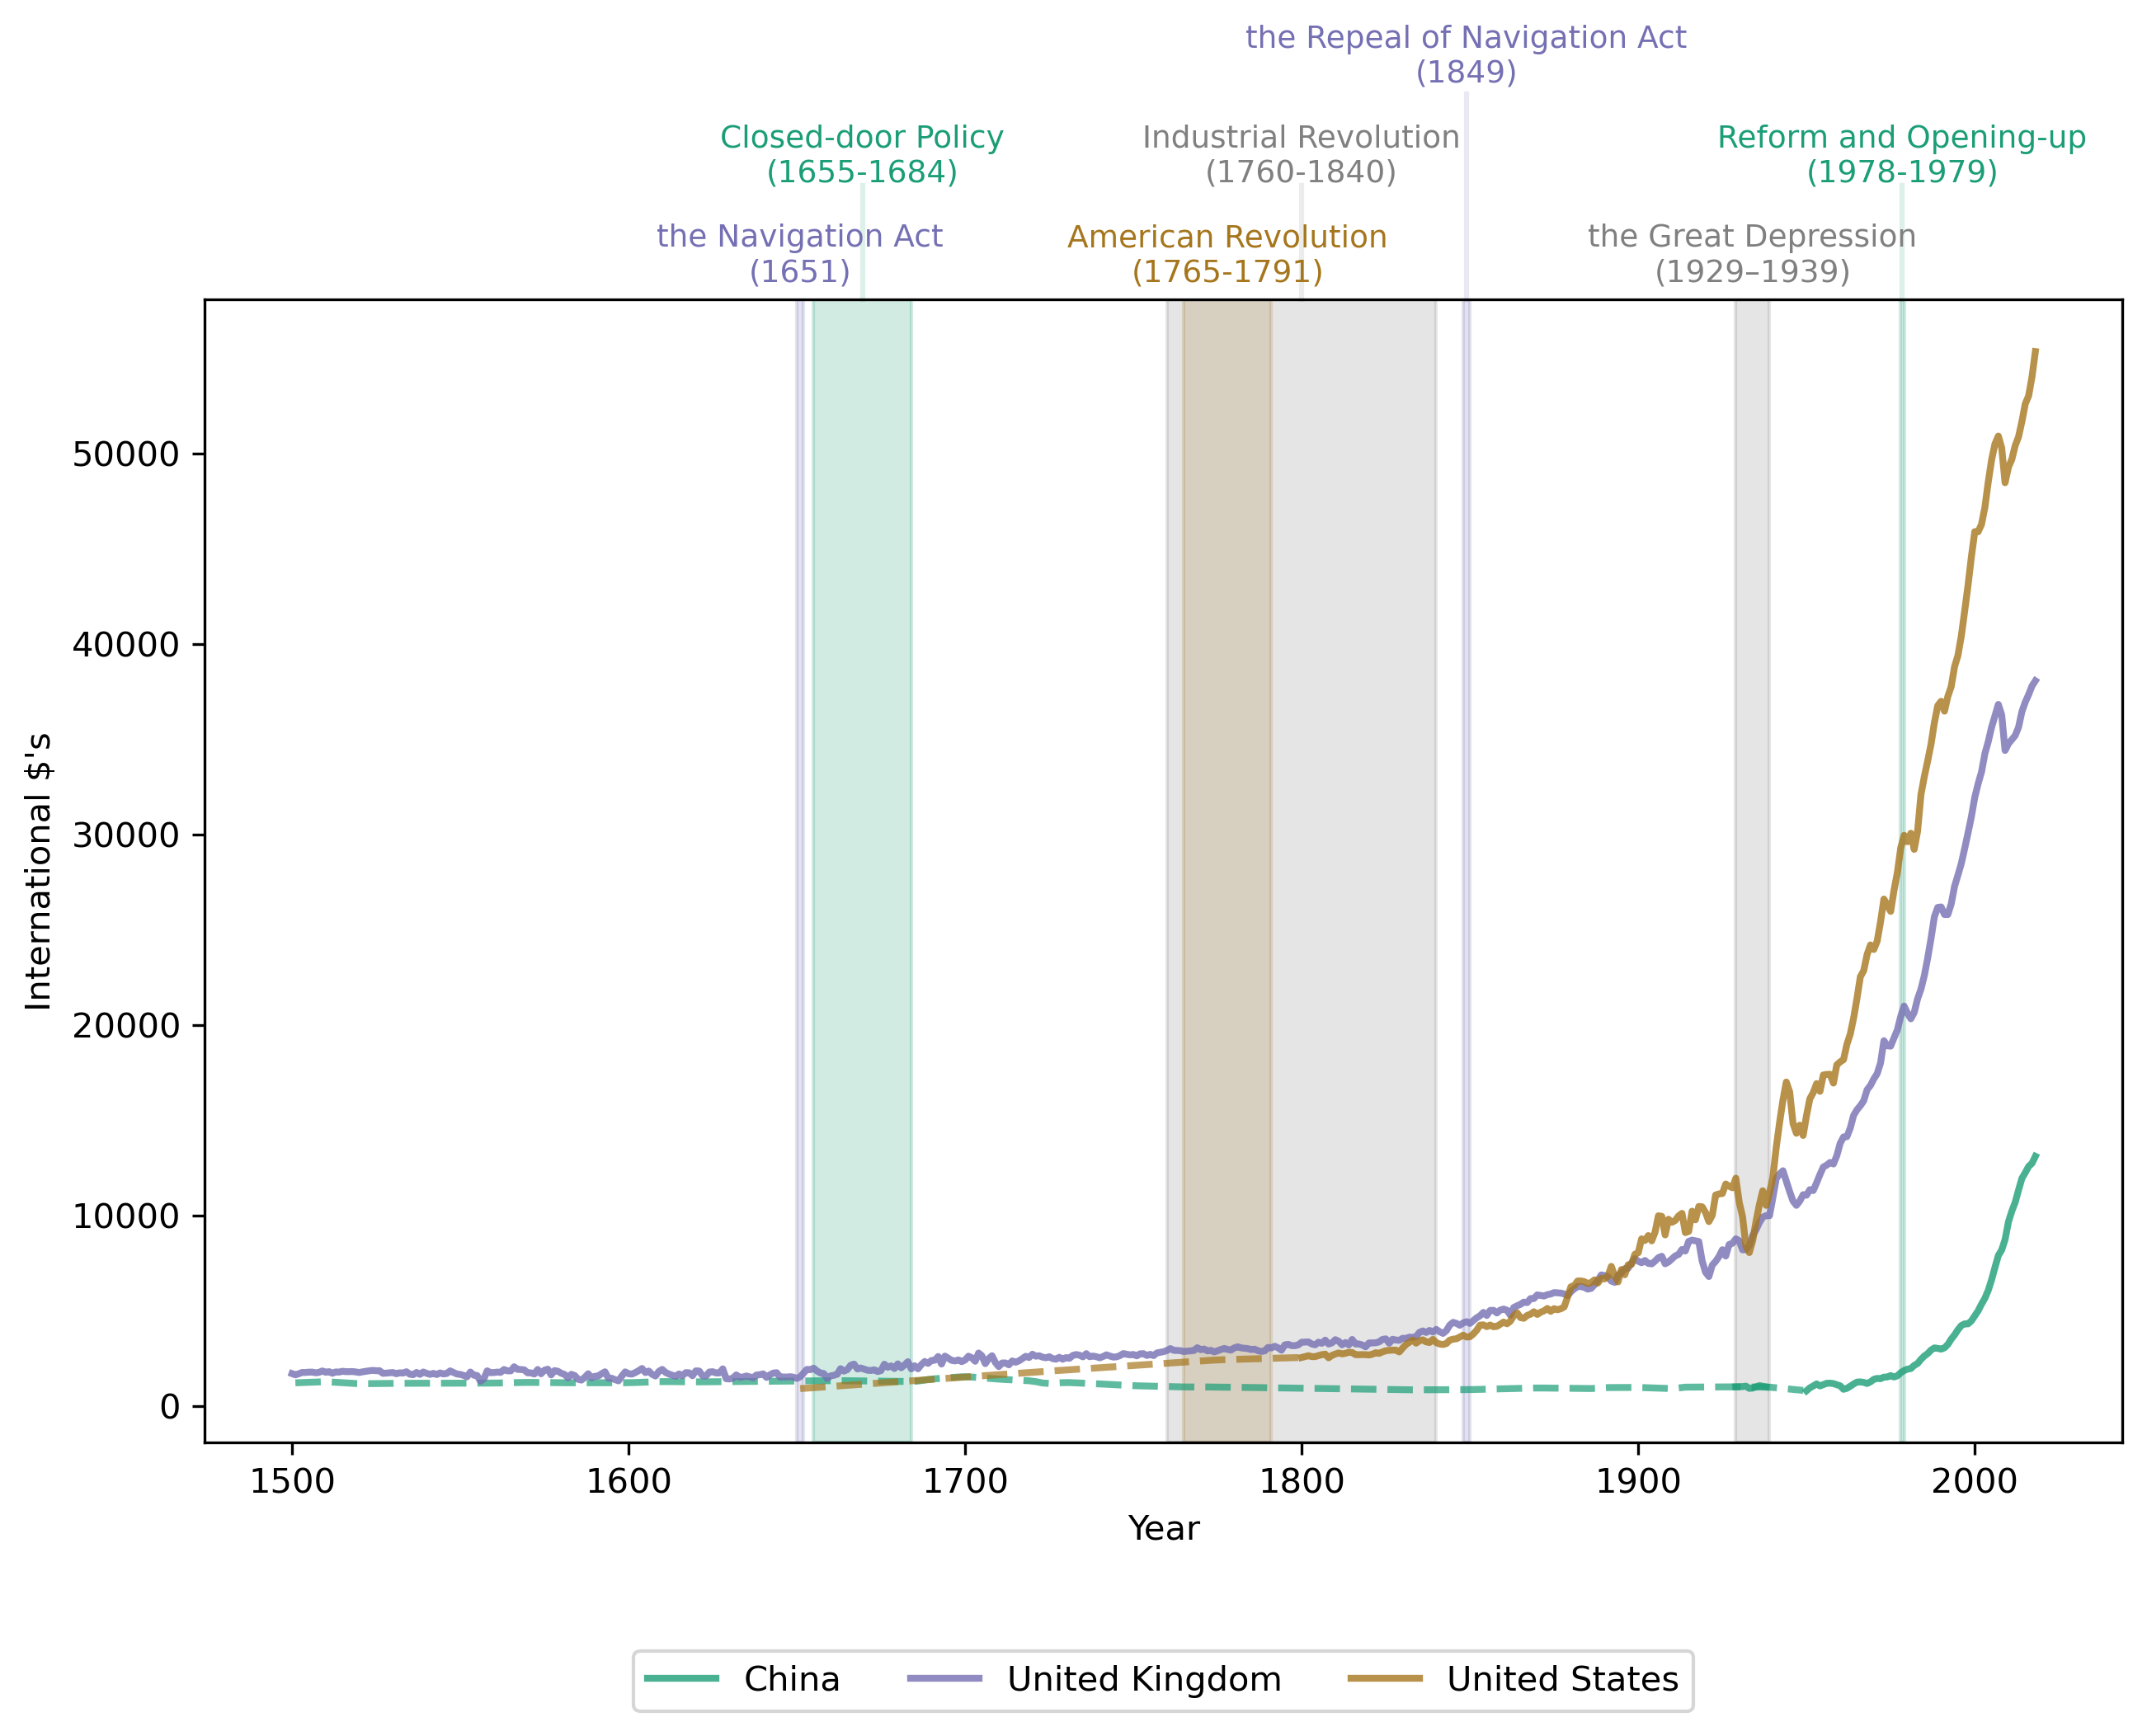

In [14]:
# generate plots for list of countries
def draw_interp_plots(series, ylabel, xlabel, color_mapping, code_to_name, lw, logscale, ax):

    for i, c in enumerate(cntry):
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                linestyle='-',
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale == True:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='lower center', ncol=5, bbox_to_anchor=[0.5, -0.25])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    return ax




# compare country;s growth
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

cntry = ['CHN', 'GBR', 'USA']
ax = draw_interp_plots(gdppc[cntry].loc[1500:],
    'International $\'s','Year',
    color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, 
        ymax=event.ymax, color=event.color, 
        linestyle='-', clip_on=False, alpha=0.15)
        
# Draw events
draw_events(events, ax)
plt.show()

In [15]:
## industrialized world
data = pd.read_excel("mpd2020.xlsx", sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')

In [16]:
gdp

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,6.434611e+07,1.701933e+08,2.967564e+07,6.681600e+08,8.259815e+08,2.850714e+07,1.117472e+09,3.553646e+08,1.622161e+08,7.764240e+06,...,6.437485e+07,1.648266e+10,2.628246e+08,5.983983e+08,5.098025e+08,1.110009e+08,3.210041e+08,6.484552e+08,5.341918e+07,2.122250e+07
2015,6.278339e+07,1.768487e+08,3.044453e+07,6.915385e+08,8.478549e+08,2.936531e+07,1.145387e+09,3.589881e+08,1.639971e+08,7.340438e+06,...,6.483013e+07,1.690258e+10,2.838214e+08,5.589242e+08,5.439312e+08,7.990404e+07,3.275954e+08,6.568503e+08,5.498018e+07,2.102746e+07
2016,6.429743e+07,1.783339e+08,3.148182e+07,7.094261e+08,8.283730e+08,2.942693e+07,1.176481e+09,3.642183e+08,1.578124e+08,7.129465e+06,...,6.576380e+07,1.716256e+10,3.059634e+08,4.564771e+08,5.776835e+08,7.218882e+07,3.363309e+08,6.586943e+08,5.661833e+07,2.096179e+07


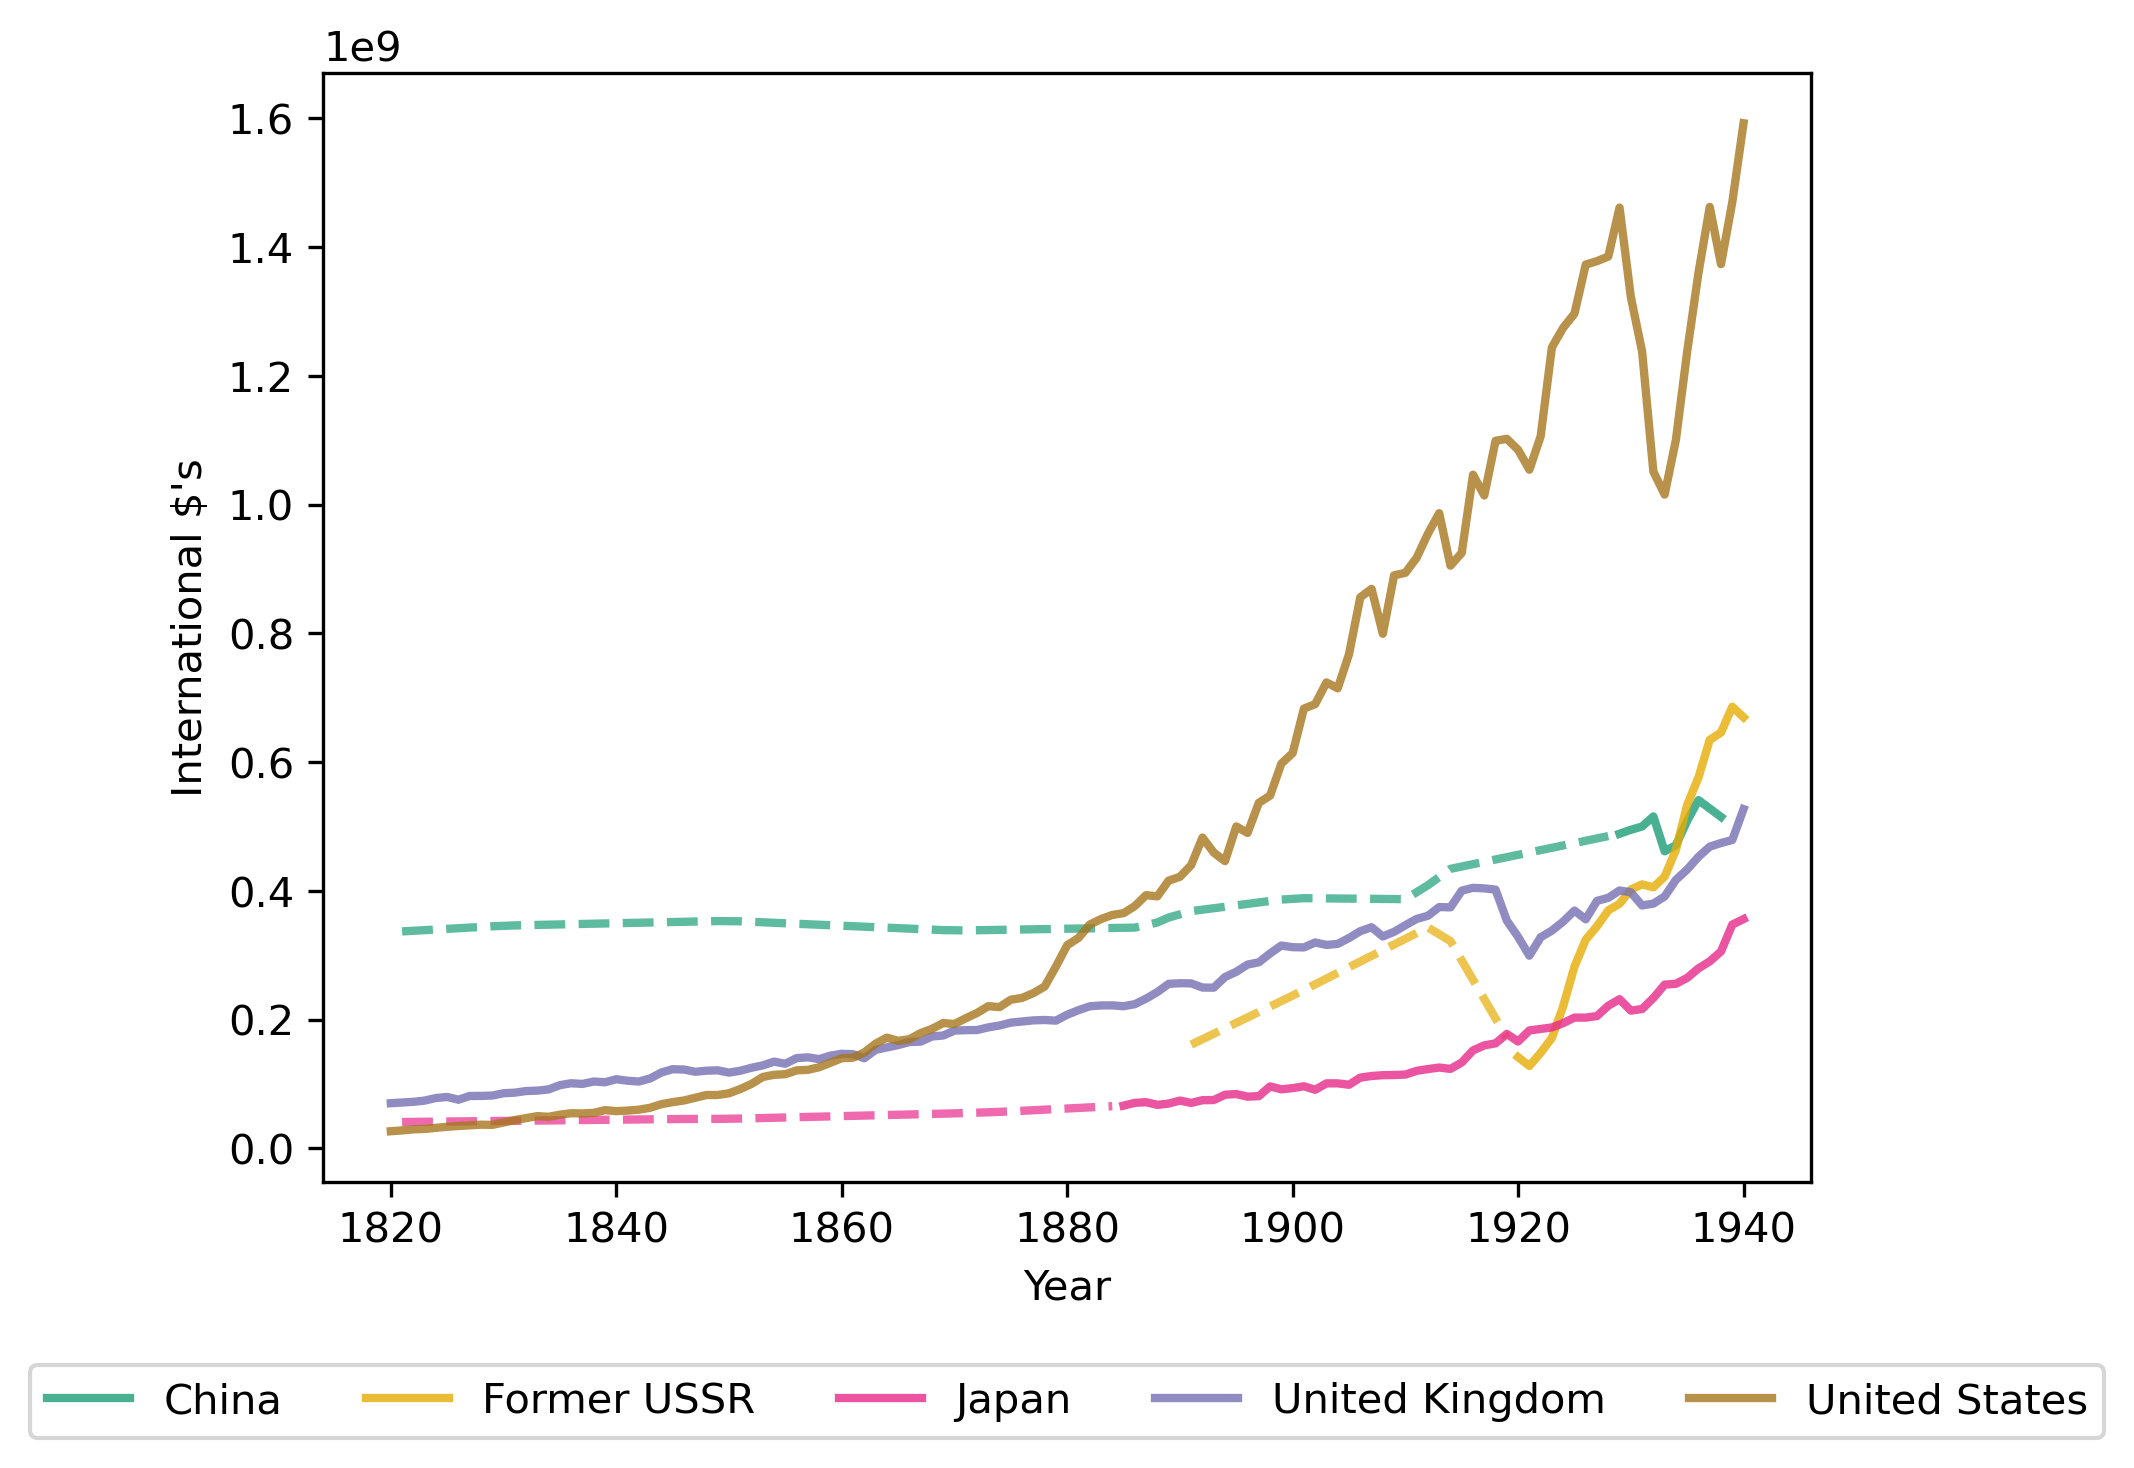

In [17]:
fig, ax = plt.subplots(dpi=300)
ax = fig.gca()
cntry = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1940)
ax = draw_interp_plots(gdp[cntry].loc[start_year:end_year],
    'International $\'s','Year',
    color_mapping, code_to_name, 2, False, ax)

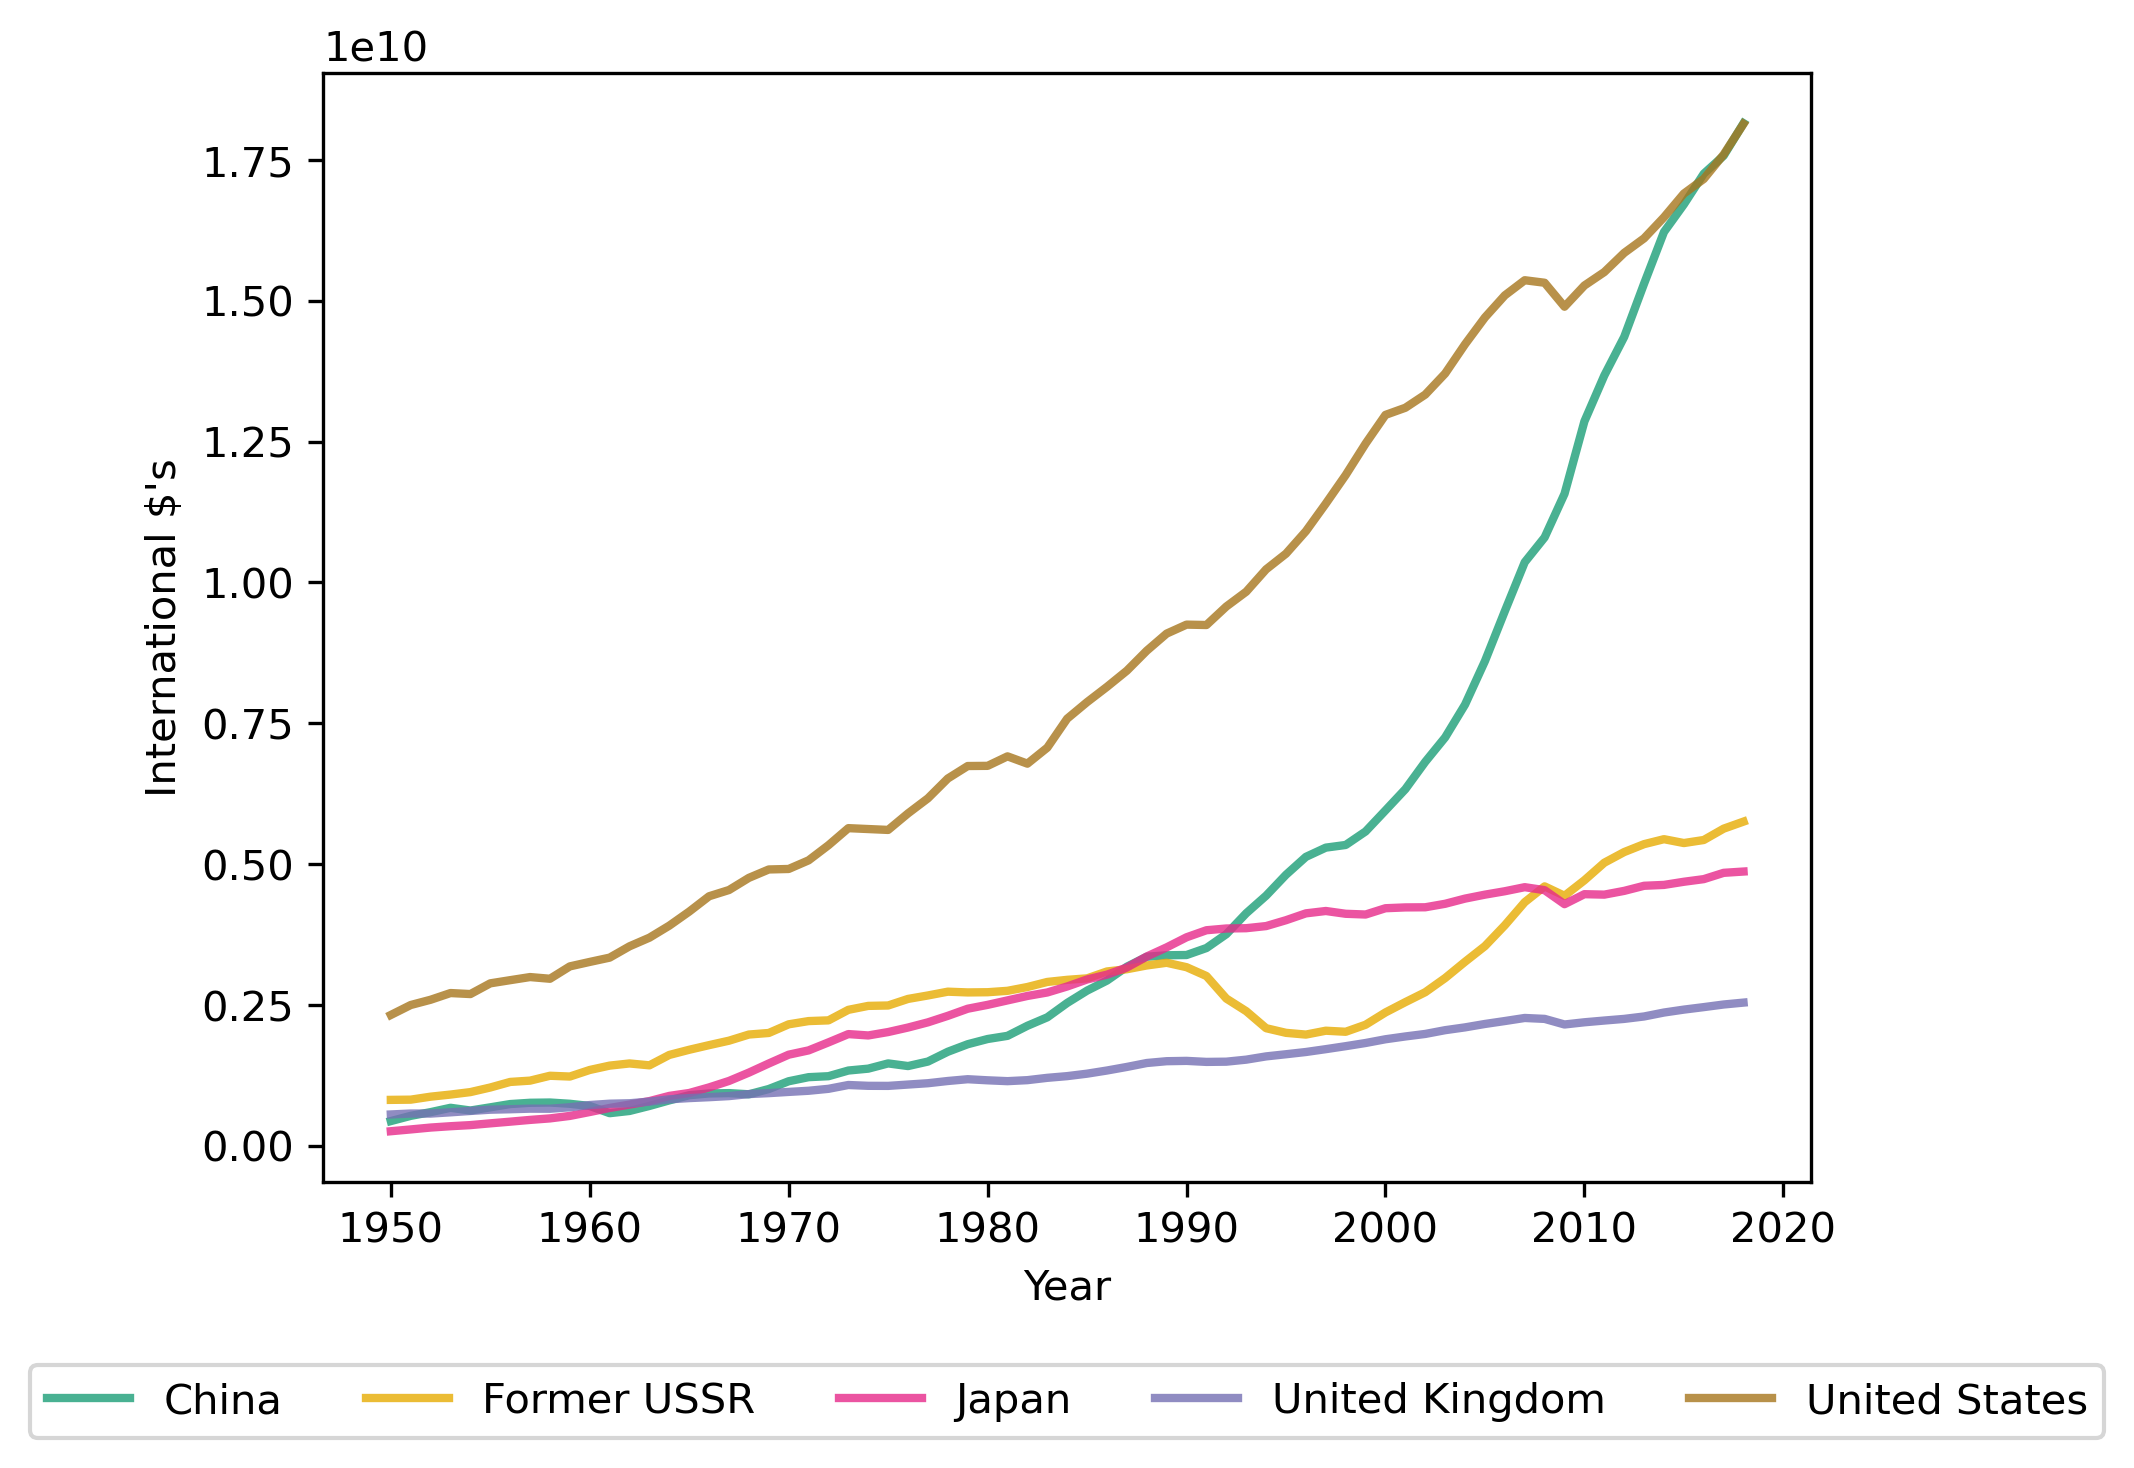

In [18]:
# modern ear (1950-2020)
fig, ax = plt.subplots(dpi=300)
ax = fig.gca()
cntry = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
ax = draw_interp_plots(gdp[cntry].loc[start_year:end_year],
    'International $\'s','Year',
    color_mapping, code_to_name, 2, False, ax)